En este EDA estudiaremos en qué momento merece más la pena comprar un coche, qué coches son los más populares en España y por qué. Lo plantearemos como que hay un amigo que quiere comprarse un coche seminuevo con un presupuesto entre los 10 y 20 mil euros y nosotros le ayudaremos.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [8]:
df_historico = pd.read_csv("../Datos\CSVs\historico_matriculaciones.csv")
df_mediana = pd.read_csv("../Datos/CSVs/Modelos_mediana_populares.csv")
df_modelos = pd.read_csv("../Datos/CSVs/Modelos_populares_wallapop.csv")

En primer lugar, veremos en qué momento es mejor comprar un coche (precios más bajos)

In [9]:
df_historico.columns

Index(['Fecha', 'Vehículos comerciales Mes', 'Vehículos pasajeros Mes',
       'Venta mensual vehículos', 'Vehículos Mes/1000 hab.',
       'Vehículos comerciales Año', 'Vehículos pasajeros Año',
       'Venta anual vehículos', 'Vehículos Año/1000 hab.'],
      dtype='object')

In [10]:
df_historico.dtypes

Fecha                         object
Vehículos comerciales Mes      int64
Vehículos pasajeros Mes        int64
Venta mensual vehículos        int64
Vehículos Mes/1000 hab.      float64
Vehículos comerciales Año      int64
Vehículos pasajeros Año        int64
Venta anual vehículos          int64
Vehículos Año/1000 hab.      float64
dtype: object

Un primer análisis del gráfico 1 nos indica que existe un patrón en la venta de los coches cada año (Estacionalidad). Durante Enero y Agosto es cuando se suelen comprar menos coches y comparativamente los picos de compra están en Marzo y Junio. Podemos interpretar este ciclo como una intención de los consumidores de estrenar su coche nuevo durante los períodos de vacaciones, también apoyado por el aumento de las ventas en diciembre, aunque más pequeño debido a los elevados gastos de estos meses.

Existe otro fenómeno cíclico, el de las automatriculaciones. A la hora de cerrar años fiscales (Principalmente en Mayo y Diciembre) los concesionarios se venden a sí mismos los coches y los "automatriculan", para que a la hora de rendir resultados financieros los números sean más favorables de cara a los stakeholders.

Todo esto causa que los mejores momentos para comprar un coche sean en Enero y Agosto, pues es cuando los concesionarios tienen un mayor stock del que deshacerse y cuando más baja es la demanda. Por eso tenemos mucha mayor probabilidad de encontrar ofertas y descuentos en estos momentos del año.

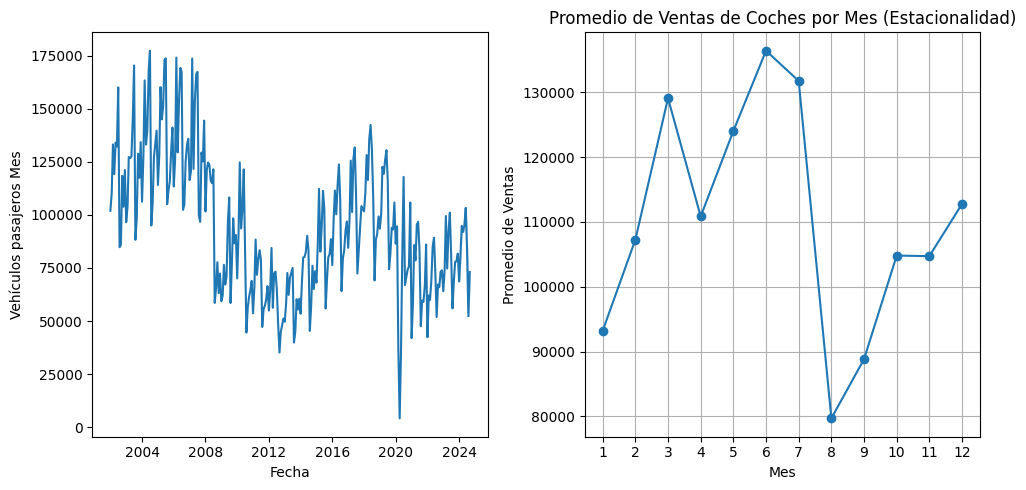

In [ ]:
#Gráfico 1: Ventas de coches a lo largo de los meses y análisis de la estacionalidad
# Convertimos la columna 'Fecha' al tipo datetime
df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'])

# Extraemos el año y el mes de la columna 'Fecha'
df_historico['Mes'] = df_historico['Fecha'].dt.month

# Agrupamos por mes para calcular la media de ventas mensuales
df_ventas_mensuales = df_historico.groupby('Mes')['Venta mensual vehículos'].mean().reset_index()

# Crear la figura y los subplots
plt.figure(figsize=(10, 5))

# Primer gráfico: Total de ventas por año
plt.subplot(1, 2, 1)
sns.lineplot(data = df_historico, x = "Fecha", y = "Vehículos pasajeros Mes")

# Segundo gráfico: Promedio de ventas por mes
plt.subplot(1, 2, 2)
plt.plot(df_ventas_mensuales['Mes'], df_ventas_mensuales['Venta mensual vehículos'], marker='o')
plt.xlabel('Mes')
plt.ylabel('Promedio de Ventas')
plt.title('Promedio de Ventas de Coches por Mes (Estacionalidad)')
plt.xticks(range(1, 13))  # Mostrar los meses como 1-12 en el eje X
plt.grid(True)

# Mostrar los gráficos
plt.tight_layout()
plt.show()


Una rápida observación de las ventas por año nos indica que a finales de la década suelen bajar los precios, en este caso no podemos establecer una tendencia clara pues tanto en 2008 como en 2019 ocurrieron dos eventos que generan ruido en el cocilo económico, llevando a la baja la demanda.

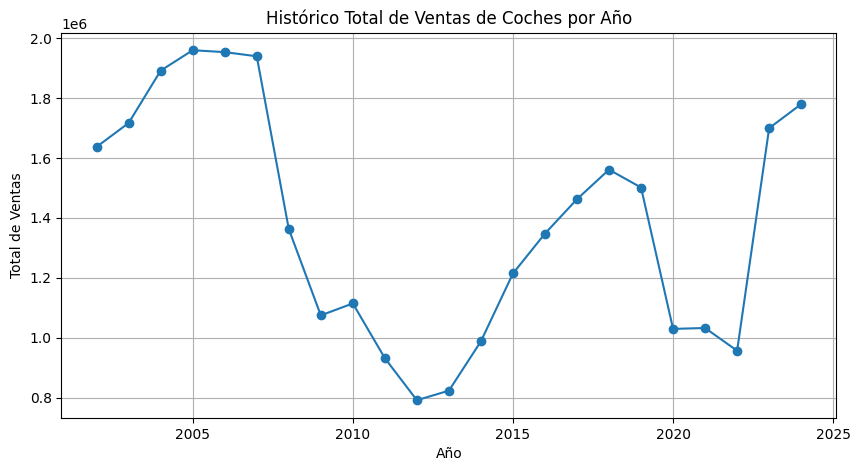

In [32]:
#Gráfico 2: Histórico de ventas por año
# Extraemos el año de la columna 'Fecha'
df_historico['Año'] = df_historico['Fecha'].dt.year

# Agrupamos por año y calculamos el total de ventas por año
df_ventas_anuales = df_historico.groupby('Año')['Venta mensual vehículos'].sum().reset_index()

# Graficamos los datos
plt.figure(figsize=(10, 5))
plt.plot(df_ventas_anuales['Año'], df_ventas_anuales['Venta mensual vehículos'], marker='o')
plt.xlabel('Año')
plt.ylabel('Total de Ventas')
plt.title('Histórico Total de Ventas de Coches por Año')
plt.grid(True)
plt.show()




Un análisis de los modelos de wallapop ayuda a asentar la teoría anterior de que la gente suele comprar más coches justo antes de verano, comprando principalmente en Mayo. En el caso del mercado de segunda mano, tiene sentido que en los períodos donde la gente gasta más en ocio o vacaciones (Verano y Navidad) haya menos demanda (Gráfico 3).

Cabe destacar que este análisis es para modelos en un precio medio-bajo, por lo que el mercado low-cost o el de lujo pueden comportarse de forma muy diferente:

In [ ]:
#Formato fecha
df_modelos.dtypes
df_modelos['Fecha'] = pd.to_datetime(df_modelos['Fecha'])

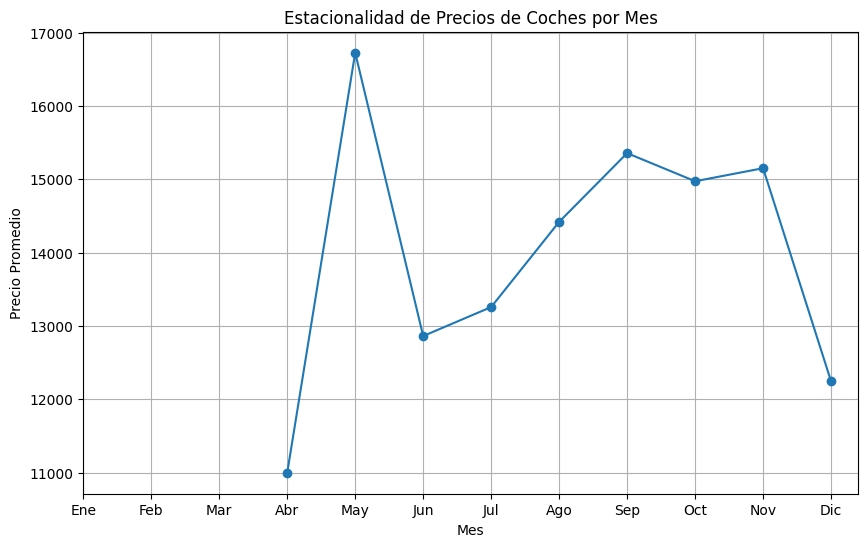

In [ ]:
#Gráfico 3: ¿Hay estacionalidad en los precios de wallapop?
# Extraemos el mes de la columna 'Fecha'
df_modelos['Mes'] = df_modelos['Fecha'].dt.month

# Agrupamos por mes y calculamos la media de precios o ventas
df_estacionalidad = df_modelos.groupby('Mes')['Precio'].mean().reset_index()

# Graficamos los datos
plt.figure(figsize=(10, 6))
plt.plot(df_estacionalidad['Mes'], df_estacionalidad['Precio'], marker='o')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio')
plt.title('Estacionalidad de Precios de Coches por Mes')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])  # Etiquetas de los meses
plt.grid(True)
plt.show()

Tras el análisis del mercado de automóviles, analicemos los modelos más populares. La selección está extraída del parque móvil consolidado a 2023. Datos procedentes de la DGT. Se han seleccionado los 10 coches más populares con etiqueta medioambiental. Es decir, los coches que más han comprado los españoles. 

In [39]:
df_modelos.columns

Index(['Modelo', 'Precio', 'Localización', 'Código_postal', 'Fecha',
       'Link_wallapop', 'Mes'],
      dtype='object')

Podemos observar que la marca más popular en el medio campo de los coches es Toyota. Probablemente porque ofrece los mejores precios para coches híbridos y con poco consumo. El precio medio se sitúa en torno a los 14.000€, y vemos que los OPEL son menos cotizados, principalmente por los problemas de fiabilidad y calidades que tuvieron a mitad de la década pasada.

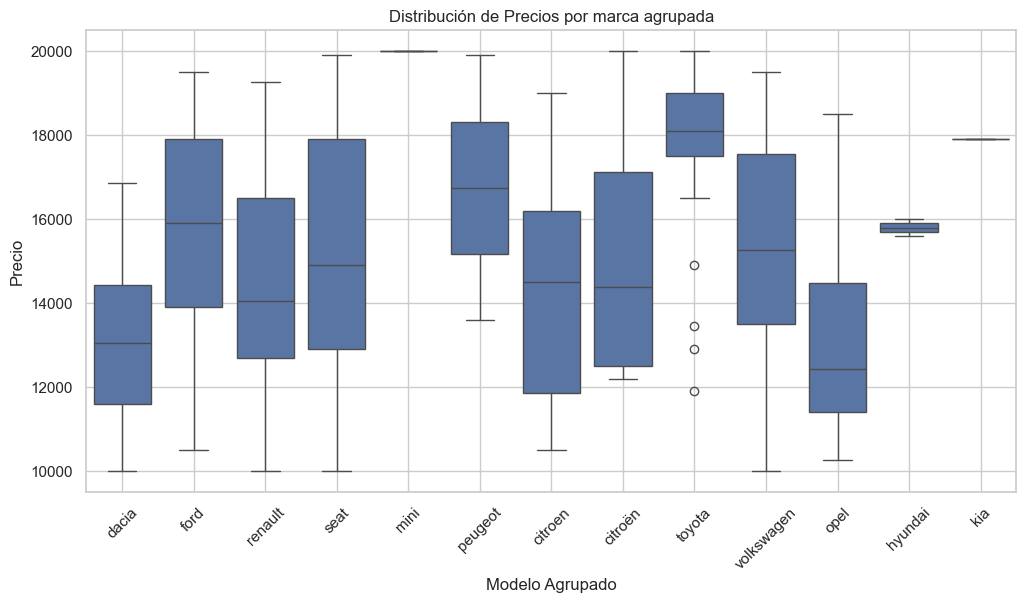

In [46]:

sns.set(style='whitegrid')

# Crear una nueva columna con las dos primeras palabras de 'Modelo'
df_modelos['Modelo_agrupado'] = df_modelos['Modelo'].apply(lambda x: ' '.join(x.lower().split()[:1]))

# Creamos el boxplot agrupando por la nueva columna
plt.figure(figsize=(12, 6))
sns.boxplot(x='Modelo_agrupado', y='Precio', data=df_modelos)
plt.xlabel('Modelo Agrupado')
plt.ylabel('Precio')
plt.title('Distribución de Precios por marca agrupada')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()


Por último, el coche representativo de la compra de segunda mano entre 10 y 20 mil euros es el Dacia Sandero:

In [47]:
df_mediana

,Modelo,Precio,Localización,Código_postal,Fecha,Link_wallapop
0,Dacia Sandero Stepway 2022,12900.0,Alcalá de Henares,28800,24-07-28,es.wallapop.com/item/dacia-sandero-stepway-202...
